<a href="https://colab.research.google.com/github/HongEnJung/Kaggle/blob/main/Instacart_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Exploration Notebook



```
1. orders.csv : 주문에 대한 정보가 포함된 파일입니다. 
  주문 번호(order_id), 
  주문한 고객의 ID(user_id), 
  주문이 속한 eval_set(prior, train, test), 
  해당 고객의 주문번호(order_number), 
  주문한 요일(order_dow), 
  주문한 시간(order_hour_of_day), 
  주문한 날짜(days_since_prior_order) 등의 정보를 포함합니다.

2. order_products__prior.csv : 이전 주문에서 주문된 제품에 대한 정보가 포함된 파일입니다. 
  주문 번호(order_id), 
  주문된 제품의 ID(product_id), 
  주문한 순서(order_number), 
  해당 제품이 재주문되었는지 여부(reordered) 등의 정보를 포함합니다.

3. order_products__train.csv : 훈련 데이터에서 주문된 제품에 대한 정보가 포함된 파일입니다. 
  주문 번호(order_id), 
  주문된 제품의 ID(product_id), 
  주문한 순서(order_number), 
  해당 제품이 재주문되었는지 여부(reordered) 등의 정보를 포함합니다.

4. products.csv : 제품에 대한 정보가 포함된 파일입니다. 
  제품의 ID(product_id), 
  제품 이름(product_name), 
  제품이 속한 aisle 이름(aisle_id, aisle) 
  department 이름(department_id, department) 등의 정보를 포함합니다.

5. aisles.csv : 상품의 카테고리 정보가 포함된 파일입니다. 
  aisle_id와 aisle 이름 정보를 포함합니다.

6. departments.csv : 상품의 부서 정보가 포함된 파일입니다.
  department_id와 department 이름 정보를 포함합니다.
```



In [1]:
# libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.options.mode.chained_assignment= None # default='warn'

In [3]:
from subprocess import check_output
print(check_output(['ls','/content/drive/MyDrive/캐글/Instacart Market Basket Analysis']).decode('utf-8'))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [4]:
order_pro_train=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/order_products__train.csv')
order_pro_prior=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/order_products__prior.csv')
orders=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/orders.csv')
products=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/products.csv')
aisles=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/aisles.csv')
departments=pd.read_csv('/content/drive/MyDrive/캐글/Instacart Market Basket Analysis/departments.csv')

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_pro_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_pro_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


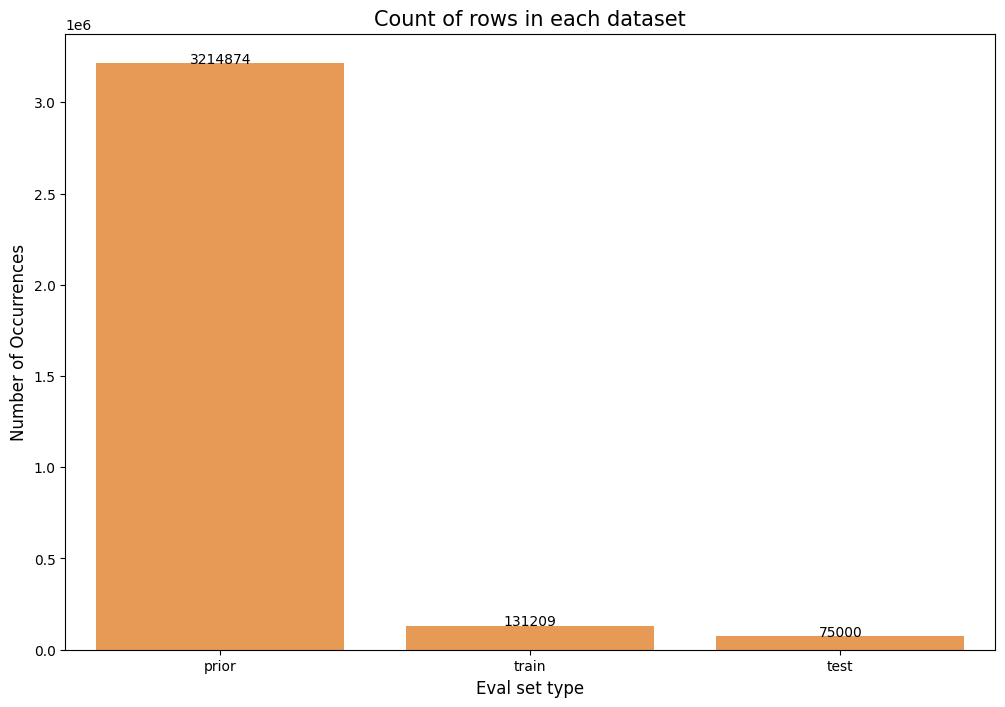

In [8]:
cnt_srs = orders['eval_set'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize =12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize = 15)

# 각 바에 레이블 추가
for i , v in enumerate(cnt_srs.values): #인덱스와 값을 순서쌍으로 반환환
  plt.text(i,v,str(v), color='black', ha='center')

plt.show()

In [9]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs = orders.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnt_srs

# user_id 중복제거 eval_set의 개수

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

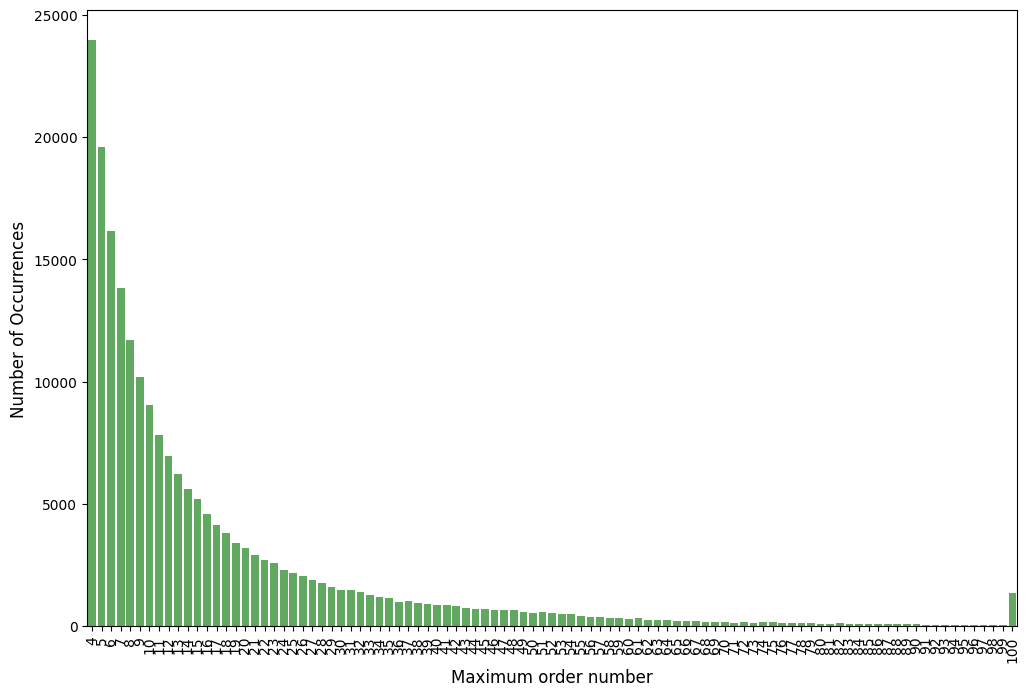

In [10]:
# user_id별 order_number 가장 큰값
cnt_srs = orders.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs['order_number'].value_counts() #order_number의 빈도수

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha = 0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation = 'vertical')
plt.show()

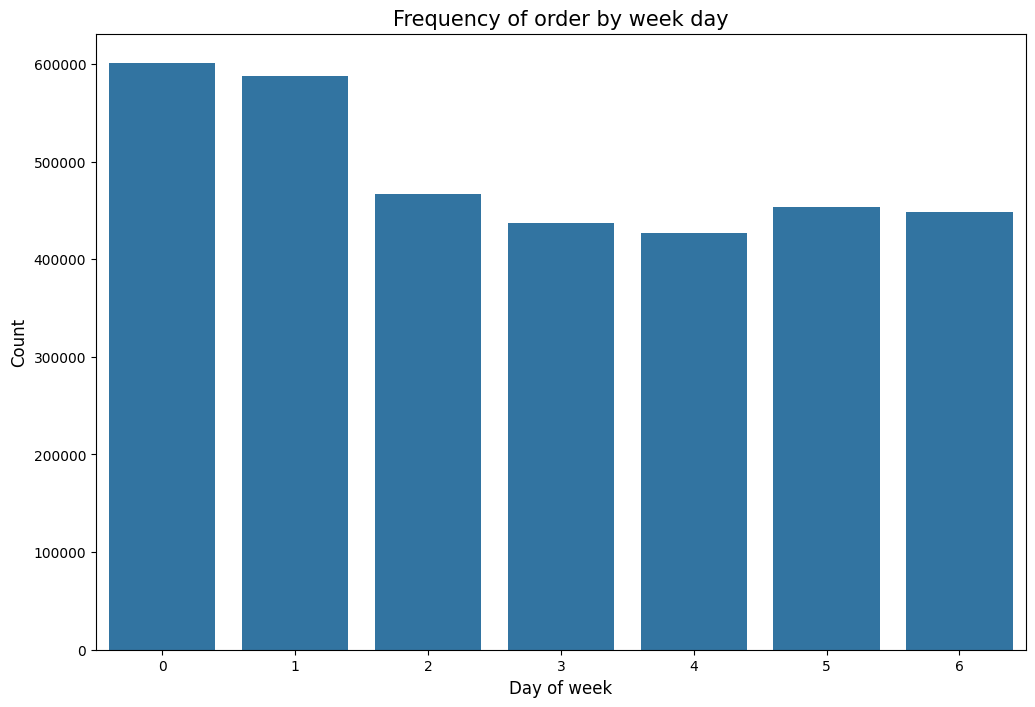

In [11]:
# 요일별 주문량
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders, color=color[0]) #order_dow 요일
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.title('Frequency of order by week day', fontsize=15)
plt.show()

# 0(일요일) ~ 6(토요일)

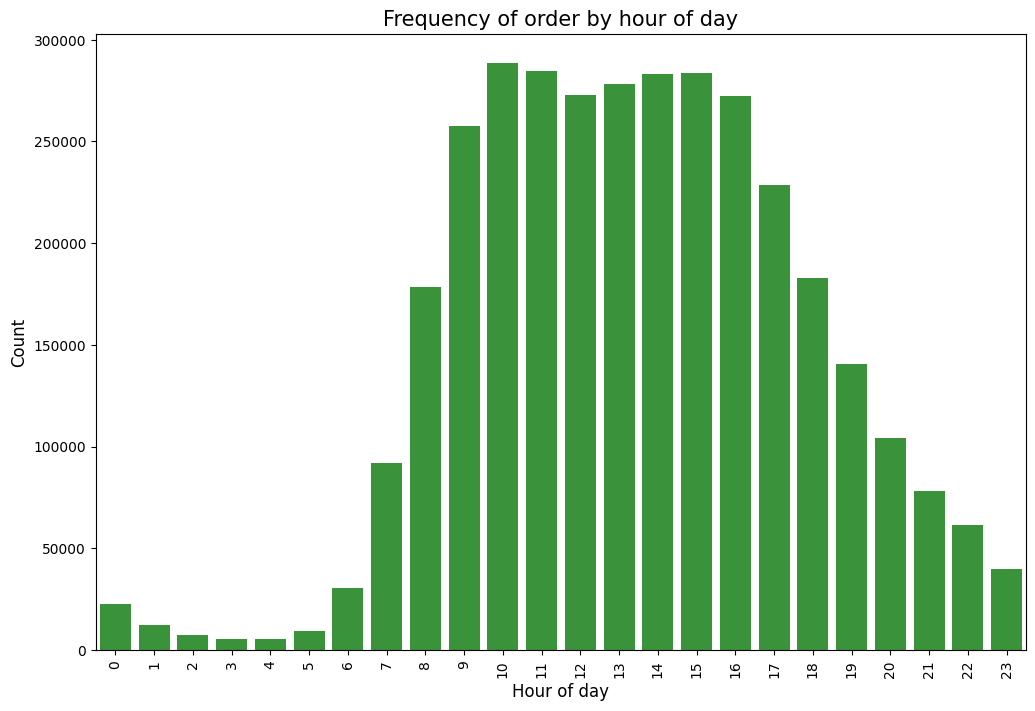

In [12]:
# 시간별 주문량
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

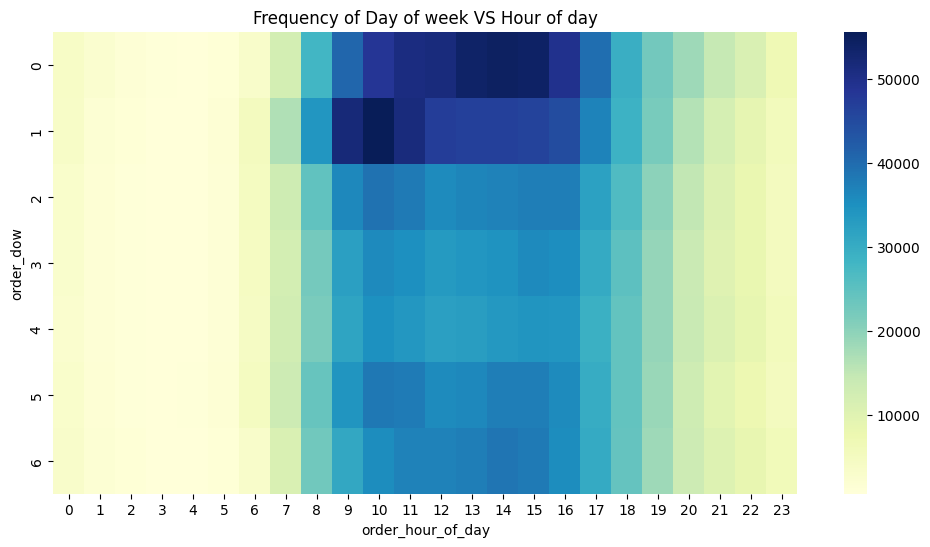

In [13]:
# 주문 요일과 주문 시간 그래프

grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped = grouped.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped, cmap='YlGnBu')
plt.title('Frequency of Day of week VS Hour of day')
plt.show()

In [14]:
grouped

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


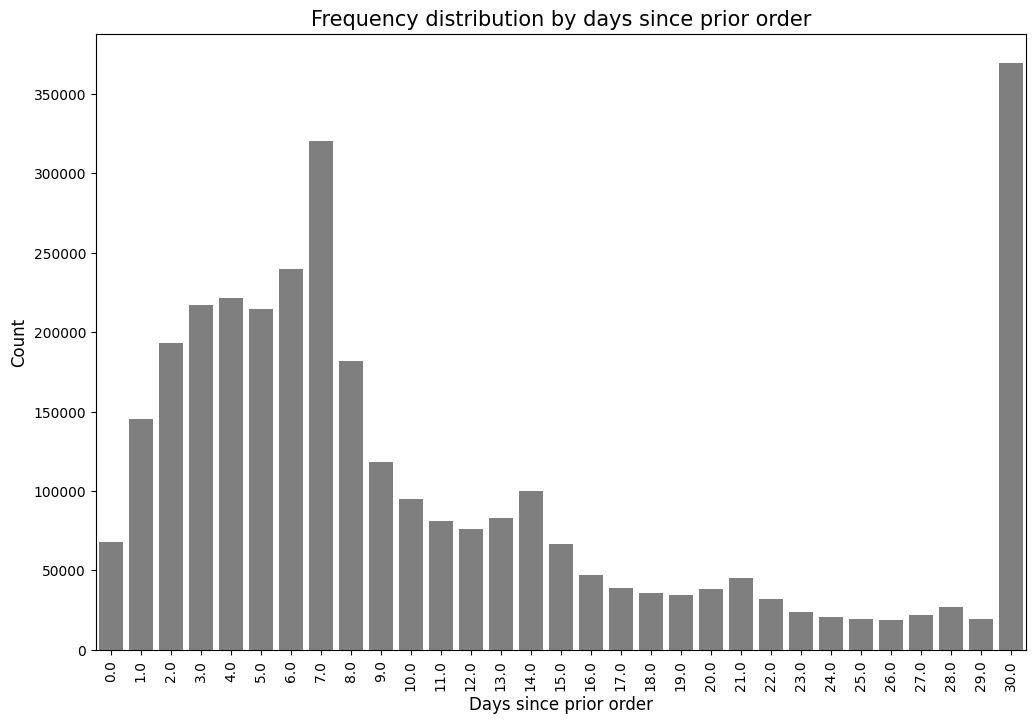

In [15]:
# 이전 주문한 날짜
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[7])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [16]:
# percentage of re-orders in prior set #
order_pro_prior.reordered.sum() / order_pro_prior.shape[0]

0.5896974667922161

In [17]:
# percentage of re-orders in train set #
order_pro_train.reordered.sum() / order_pro_train.shape[0]

0.5985944127509629

In [18]:
# https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart/notebook

In [19]:
# no-re-ordered products

grouped=order_pro_prior.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped["reordered"].loc[grouped["reordered"]>1] = 1
grouped.reordered.value_counts() / grouped.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [20]:
grouped=order_pro_train.groupby('order_id')['reordered'].aggregate('sum').reset_index()
grouped["reordered"].loc[grouped["reordered"]>1] = 1
grouped.reordered.value_counts() / grouped.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

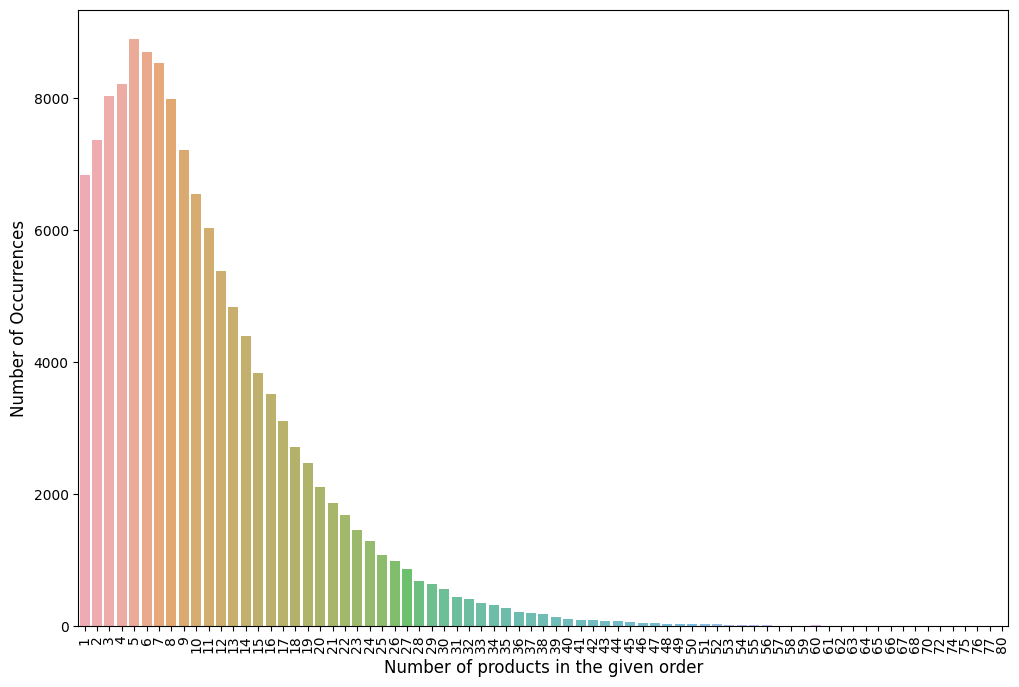

In [21]:
grouped = order_pro_train.groupby('order_id')['add_to_cart_order'].agg('max').reset_index()
cnt_srs = grouped.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [24]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [25]:
order_pro_prior = pd.merge(order_pro_prior, products, on='product_id', how='left')
order_pro_prior = pd.merge(order_pro_prior, aisles, on='aisle_id', how='left')
order_pro_prior = pd.merge(order_pro_prior, departments, on='department_id', how='left')
order_pro_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [26]:
cnt_srs = order_pro_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


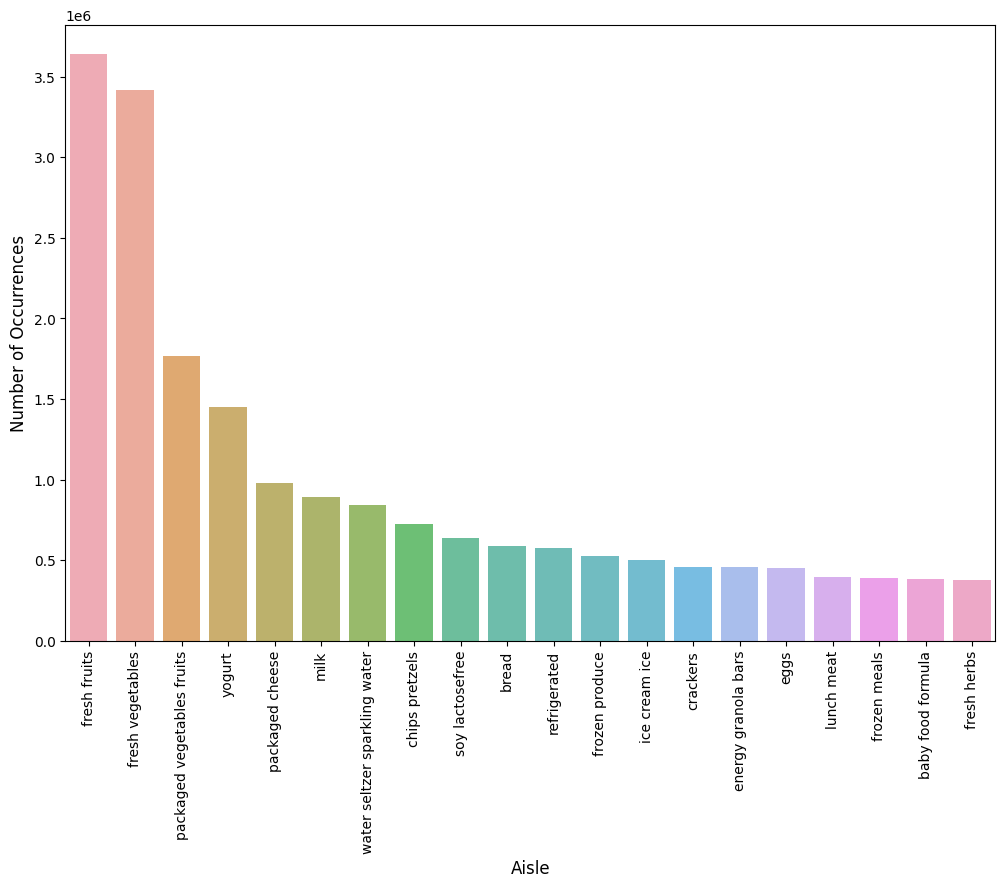

In [31]:
cnt_srs = order_pro_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()